# Plots.jl examples

These examples were slightly modified from some of [the GR examples in the Plots.jl documentation](http://docs.juliaplots.org/latest/examples/gr/) and can be used as both a tutorial or as a series of test for the UnitfulRecipes package
(they are essentially the same except we have added some units to the data).

First we need to tell Julia we are using Plots, Unitful, and UnitfulRecipes

In [1]:
using Plots, Unitful, UnitfulRecipes

## Lines

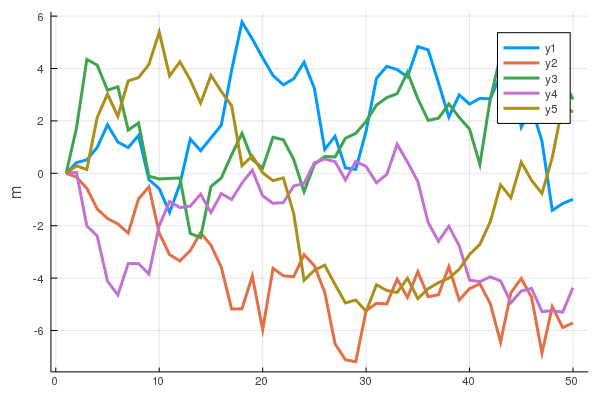

In [2]:
plot(Plots.fakedata(50, 5) * u"m", w=3)

## Parametric plots

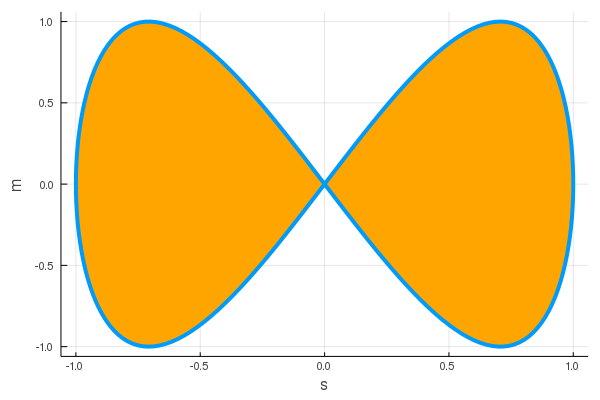

In [3]:
plot(t -> sin(t)*u"s", t -> sin(2t)*u"m", 0, 2π, line=4, leg=false, fill=(0, :orange))

## Colors

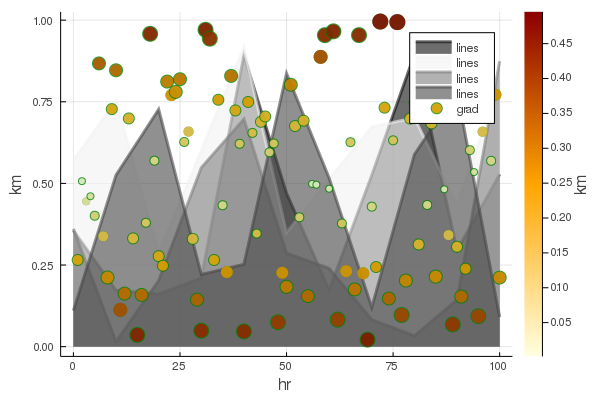

In [4]:
y = rand(100)*u"km"
plot((0:10:100)*u"hr", rand(11, 4)*u"km", lab="lines", w=3, palette=:grays, fill=0, α=0.6)
scatter!(y, zcolor=abs.(y .- 0.5u"km"), m=(:heat, 0.8, Plots.stroke(1, :green)), ms=10 * abs.(y .- 0.5u"km") .+ 4u"km", lab="grad")

## Global

Note that a few changes had to be made for this to work.

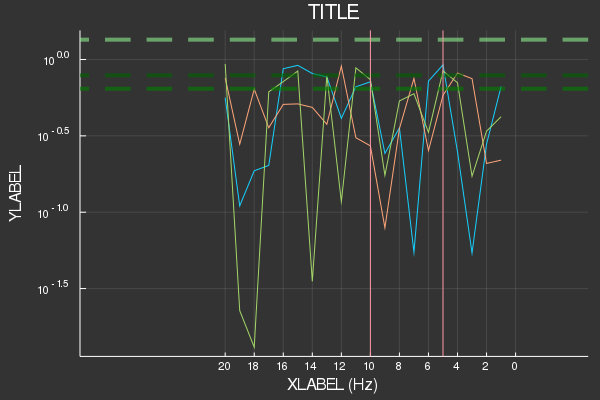

In [5]:
using Statistics
y = rand(20, 3)*u"W"
x = (1:size(y,1))*u"Hz"
plot(x, y, xlabel="XLABEL", xlims=(-5, 30), xflip=true, xticks=0:2:20, background_color=RGB(0.2, 0.2, 0.2), leg=false)
hline!(mean(y, dims=1) + rand(1, 3)*u"W", line=(4, :dash, 0.6, [:lightgreen :green :darkgreen]))
vline!([5, 10]*u"Hz")
title!("TITLE")
yaxis!("YLABEL", :log10)

## Arguments

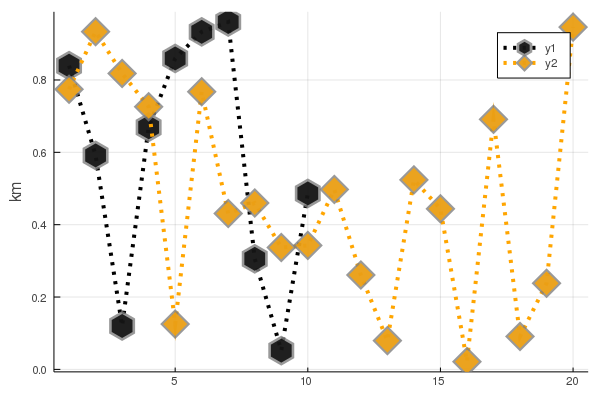

In [6]:
ys = Vector[rand(10), rand(20)] .* u"km"
plot(ys, color=[:black :orange], line=(:dot, 4), marker=([:hex :d], 12, 0.8, Plots.stroke(3, :gray)))

## Build plot in pieces

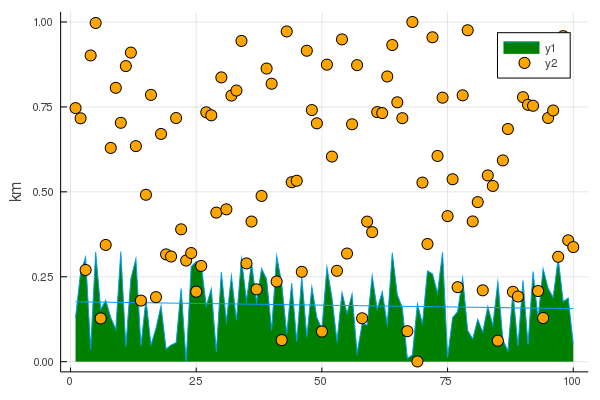

In [7]:
plot(rand(100) / 3 * u"km", reg=true, fill=(0, :green))
scatter!(rand(100) * u"km", markersize=6, c=:orange)

## Histogram2D

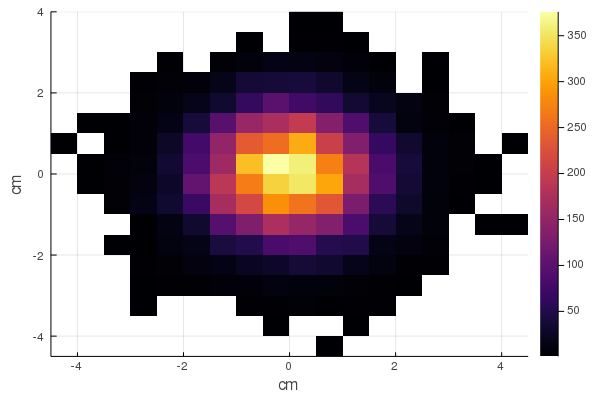

In [8]:
histogram2d(randn(10000) * u"cm", randn(10000) * u"cm", nbins=20)

## Line types

```
linetypes = [:path :steppre :steppost :sticks :scatter]
n = length(linetypes)
x = Vector[sort(rand(20)) for i = 1:n] * u"km"
y = rand(20, n) * u"ms"
plot(x, y, line=(linetypes, 3), lab=map(string, linetypes), ms=15)
```

## Line styles

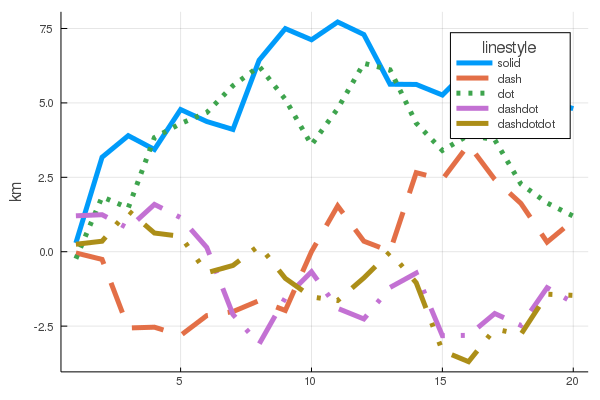

In [9]:
styles = intersect([:solid, :dash, :dot, :dashdot, :dashdotdot], Plots.supported_styles())
styles = reshape(styles, 1, length(styles))
n = length(styles)
y = cumsum(randn(20, n), dims=1) * u"km"
plot(y, line=(5, styles), label=map(string, styles), legendtitle="linestyle")

## Marker types

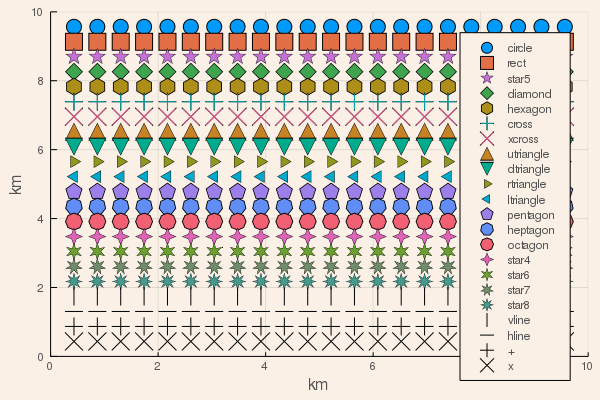

In [10]:
markers = intersect(Plots._shape_keys, Plots.supported_markers())
markers = reshape(markers, 1, length(markers))
n = length(markers)
x = (range(0, stop=10, length=n + 2))[2:end - 1] * u"km"
y = repeat(reshape(reverse(x), 1, :), n, 1)
scatter(x, y, m=(8, :auto), lab=map(string, markers), bg=:linen, xlim=(0, 10), ylim=(0, 10))

## Bar

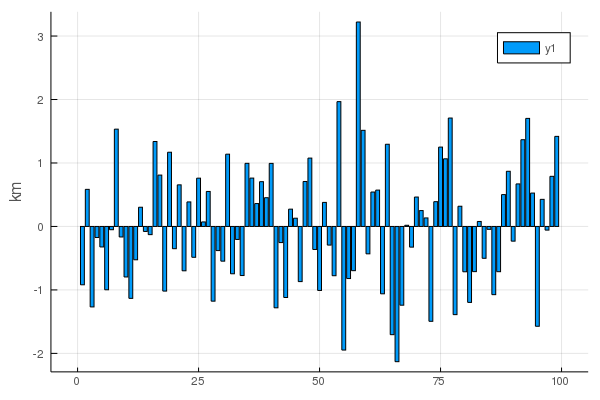

In [11]:
bar(randn(99) * u"km")

## Histogram

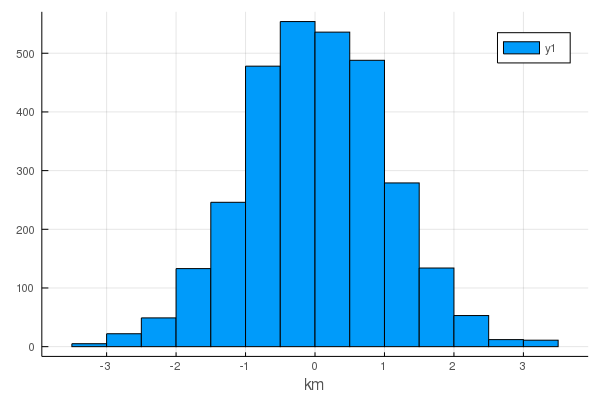

In [12]:
histogram(randn(1000) * u"km", bins=:scott, weights=repeat(1:5, outer=200))

## Subplots

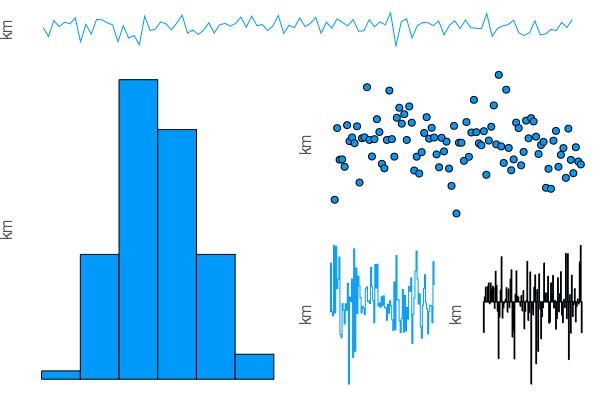

In [13]:
l = @layout([a{0.1h};b [c;d e]])
plot(randn(100, 5) * u"km", layout=l, t=[:line :histogram :scatter :steppre :bar], leg=false, ticks=nothing, border=:none)

## Adding to subplots

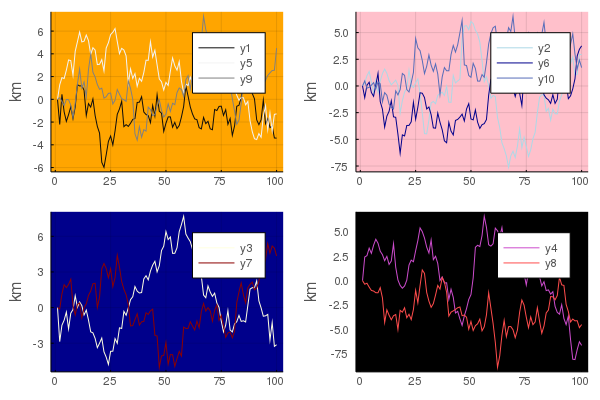

In [14]:
plot(Plots.fakedata(100, 10) * u"km", layout=4, palette=[:grays :blues :heat :lightrainbow], bg_inside=[:orange :pink :darkblue :black])

## Contour plots

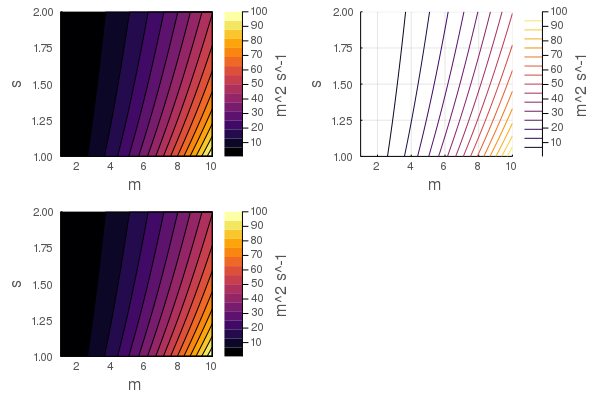

In [15]:
x = (1:0.05:10) * u"m"
y = (1:0.01:2) * u"s"
f(x,y) = x^2 / y
z = f.(x',y)
p1 = contour(x, y, f, fill=true)
p2 = contour(x, y, z)
p3 = contourf(x, y, z)
plot(p1, p2, p3)

## 3D

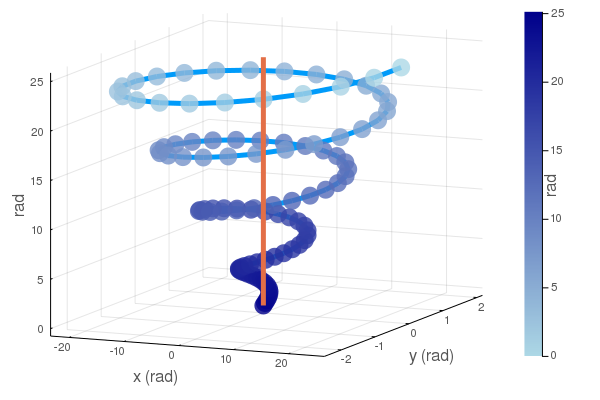

In [16]:
n = 100
ts = range(0, stop=8π, length=n) * u"rad"
x = @. ts * cos(ts)
y = @. 0.1ts * sin(ts)
z = ts
plot(x, y, z, zcolor=reverse(z), m=(10, 0.8, :blues, Plots.stroke(0)), leg=false, cbar=true, w=5, xlabel="x", ylabel="y", zlabel="z")
plot!(zeros(n), zeros(n), z, w=5)

## Groups and Subplots

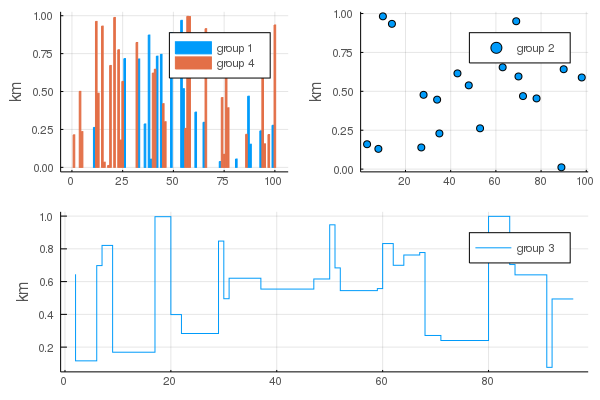

In [17]:
group = rand(map((i->"group $(i)"), 1:4), 100)
plot(rand(100)*u"km", layout=@layout([a b;c]), group=group, linetype=[:bar :scatter :steppre], linecolor=:match)

## Heatmap, categorical axes, and aspect_ratio

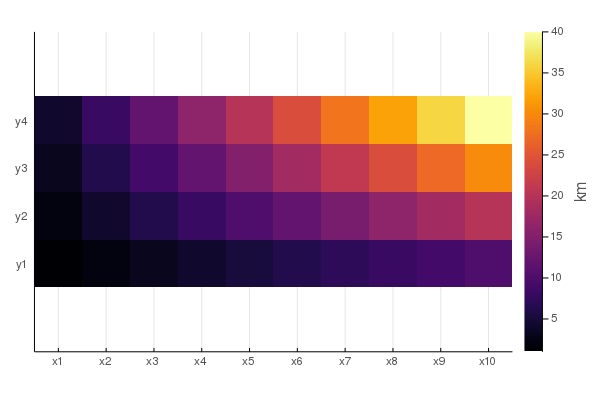

In [18]:
xs = [string("x", i) for i = 1:10]
ys = [string("y", i) for i = 1:4]
z = float((1:4) * reshape(1:10, 1, :)) * u"km"
heatmap(xs, ys, z, aspect_ratio=1)

## Magic grid argument

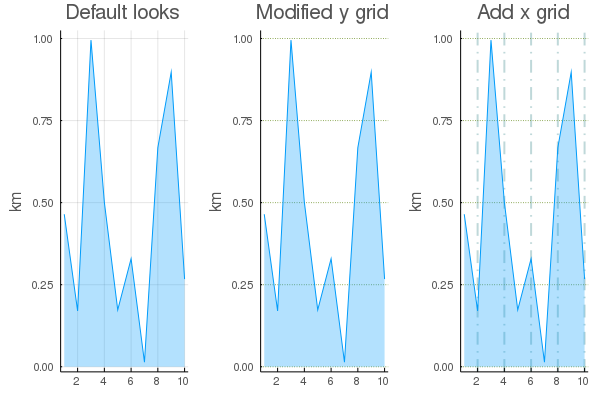

In [19]:
x = rand(10) * u"km"
p1 = plot(x, title="Default looks")
p2 = plot(x, grid=(:y, :olivedrab, :dot, 1, 0.9), title="Modified y grid")
p3 = plot(deepcopy(p2), title="Add x grid")
xgrid!(p3, :on, :cadetblue, 2, :dashdot, 0.4)
plot(p1, p2, p3, layout=(1, 3), label="", fillrange=0, fillalpha=0.3)

## Framestyle

Suggestion: we might want to not add the unit label when the axis is not shown?

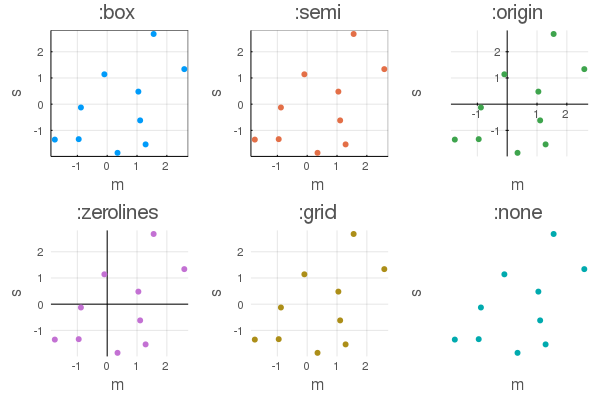

In [20]:
scatter(fill(randn(10), 6) * u"m", fill(randn(10), 6) * u"s", framestyle=[:box :semi :origin :zerolines :grid :none], title=[":box" ":semi" ":origin" ":zerolines" ":grid" ":none"], color=permutedims(1:6), layout=6, label="", markerstrokewidth=0, ticks=-2:2)

## Lines and markers with varying colors

note that marker_z as a function did not work so it is modified here

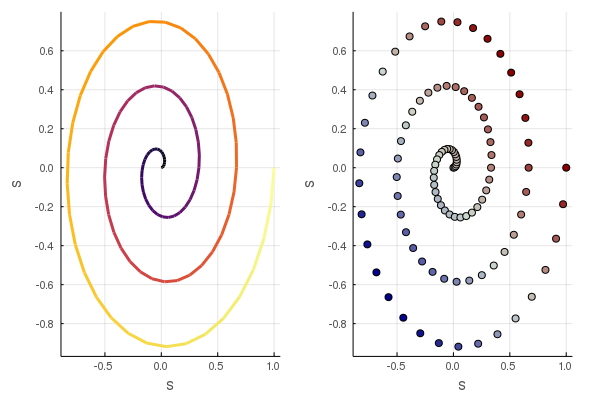

In [21]:
t = range(0, stop=1, length=100) * u"s"
θ = 6π * u"rad/s" * t
x = @. t * cos(θ)
y = @. t * sin(θ)
z = x + y
p1 = plot(x, y, line_z=t, linewidth=3, legend=false)
p2 = scatter(x, y, marker_z=z, color=:bluesreds, legend=false)
plot(p1, p2)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*